In [ ]:
import TimeSliceImport
import numpy as np
import keras
import random

from sklearn import (metrics,preprocessing)
import RamanPlotTools as pt
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage

from scipy import interpolate

In [25]:
path="/Users/morten/Desktop/SKYP_KYP_SYP/"
numClasses=4
types=["PS", "yeast","spore","kleb"]
spectra=TimeSliceImport.importData(path,types)
classes=list(map(lambda x:TimeSliceImport.RamanSample.mappings[x],types))
sortedTypesTuples=sorted(zip(types,classes),key=lambda x:x[1])
sortedTypes=[x[0] for x in sortedTypesTuples]

startPNT=201


def makeRandomData(start=startPNT,end=1600,points=1000,derivative=-1,window=41):
    trainingSamples, validationSamples = TimeSliceImport.splitData(spectra, 0.25)
    trainingSpectraList = list(map(lambda x: x.interpolatedSpectra(start, end, points,derivative=derivative,windowSize=window), trainingSamples))
    validationSpectraList = list(map(lambda x: x.interpolatedSpectra(start, end, points,derivative=derivative,windowSize=window), validationSamples))
    
    trainingData,trainingClasses,validationData,validationClasses = TimeSliceImport.makeSVMInputData(trainingSpectraList,
                                                                                                     validationSpectraList)
    
   
    
    oneHotTrainingClasses=keras.utils.to_categorical(trainingClasses,num_classes=numClasses)
    oneHotValidationClasses=keras.utils.to_categorical(validationClasses,num_classes=numClasses)
    return trainingData, oneHotTrainingClasses, validationData, oneHotValidationClasses

trainingData, oneHotTrainingClasses, validationData, oneHotValidationClasses=makeRandomData()


def scalarClassesFromOneHotArray(oneHotArray):
    return np.argmax(oneHotArray,axis=1)

def plotResult(truth,result, score, normalize=False):
    pt.plotResult(scalarClassesFromOneHotArray(result),scalarClassesFromOneHotArray(truth),sortedTypes)
    mtrx = metrics.confusion_matrix(scalarClassesFromOneHotArray(truth),scalarClassesFromOneHotArray(result))
    pt.plotConfusionMatrix(mtrx,sortedTypes,"Classification Result (%.03g )" % score, normalize=normalize)

def plotLearning(history):
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training Accuracy', 'Cross-Validation Accuracy'])
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training Loss', 'Cross-Validation Loss'])
    plt.show()


glassAg_KYP_kleb_21.txt


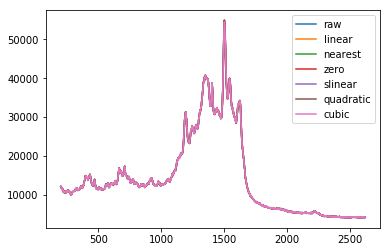

In [68]:
randomSample=random.choice(spectra)
print(randomSample.name)
randomSpectrum=(np.transpose(randomSample.spectra)[0])
plt.plot(randomSample.waveNumbers,randomSpectrum)
newX=np.linspace(randomSample.waveNumbers[0],randomSample.waveNumbers[-1],len(randomSample.waveNumbers))
interpolators=["linear","nearest","zero","slinear","quadratic","cubic"]

for kind in interpolators:
    interpolator = interpolate.interp1d(randomSample.waveNumbers,randomSpectrum,kind=kind)   
    interpolated=interpolator(newX)

    plt.plot(newX,interpolated)




titles=["raw"]
titles.extend(interpolators)

plt.legend(titles)
plt.show()


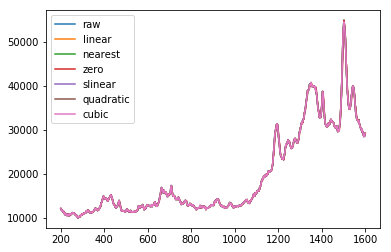

In [ ]:
endWN=1600
numPNTS=1000

xSubrange=np.nonzero((randomSample.waveNumbers > startPNT) & (randomSample.waveNumbers < endWN))


plt.plot(randomSample.waveNumbers[xSubrange],randomSpectrum[xSubrange])

newX=np.linspace(startPNT,endWN,numPNTS)

for kind in interpolators:
    interpolator = interpolate.interp1d(randomSample.waveNumbers,randomSpectrum,kind=kind)   
    interpolated=interpolator(newX)

    plt.plot(newX,interpolated)




titles=["raw"]
titles.extend(interpolators)

plt.legend(titles)
plt.show()


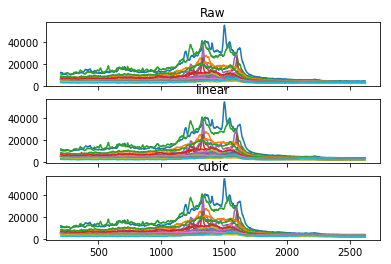

In [70]:
interpolators=["linear","cubic"]

f, axes = plt.subplots(len(interpolators)+1,1, sharex=True)

newX=np.linspace(randomSample.waveNumbers[0],randomSample.waveNumbers[-1],len(randomSample.waveNumbers))

data=np.transpose(randomSample.spectra)

for spectrum in data:
    axes[0].plot(randomSample.waveNumbers,spectrum)
    
axes[0].set_title("Raw")

for idx,kind in enumerate(interpolators):
    
    interpolator = interpolate.interp1d(randomSample.waveNumbers,data,kind=kind,axis=1)   
    interpolated=interpolator(newX)
    axes[idx+1].set_title(kind)
    for spectrum in interpolated:
         axes[idx+1].plot(newX,spectrum)




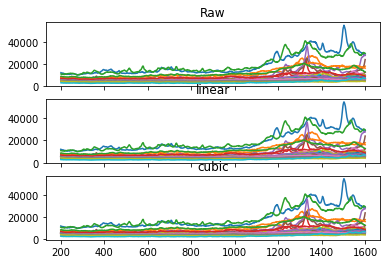

In [71]:
interpolators=["linear","cubic"]

f, axes = plt.subplots(len(interpolators)+1,1, sharex=True)

newX=np.linspace(startPNT,endWN,numPNTS)

data=np.transpose(randomSample.spectra)

for spectrum in data:
    axes[0].plot(randomSample.waveNumbers[xSubrange],spectrum[xSubrange])

axes[0].set_title("Raw")

for idx,kind in enumerate(interpolators):
    
    interpolator = interpolate.interp1d(randomSample.waveNumbers,data,kind=kind,axis=1)   
    interpolated=interpolator(newX)
    axes[idx+1].set_title(kind)
    for spectrum in interpolated:
         axes[idx+1].plot(newX,spectrum)
